In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
# Set display options to show all columns
pd.set_option('display.max_columns', None)
from sklearn.calibration import LabelEncoder

df = pd.read_csv('../DataOut/bus_stop_times_feature_added_all_moddedDF.csv')
norm_clus =pd.read_csv('../DataOut/Clusters/norm_cluster_cluster_percentages.csv')

In [2]:
df[df['direction'] == 2]

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds


In [3]:
# drop raws after 	'2022-11-01' from df
df = df[df['date']<='2022-11-01']

In [4]:
# show all the columns in pandas dataframes
pd.set_option('display.max_columns', None)

In [5]:
df

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,4890.0,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0
1,4890.0,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0
2,4890.0,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0
3,4890.0,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0
4,4890.0,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,11205.0,513,1,110,2022-10-31,18:38:31,18:38:46,0:00:15,15.0,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,191.0,mod,15.0
90560,11205.0,513,1,111,2022-10-31,18:41:11,18:41:11,0:00:00,0.0,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,145.0,br,0.0
90561,11205.0,513,1,112,2022-10-31,18:43:37,18:43:44,0:00:07,7.0,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,146.0,br,7.0
90562,11205.0,513,1,113,2022-10-31,18:46:13,18:46:28,0:00:15,15.0,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,149.0,mod,15.0


In [6]:
# selected_deviceid = norm_clus['deviceid'].unique()
# selected_deviceid

In [7]:
# df = df[df['deviceid'].isin(selected_deviceid)]
# df['deviceid'].unique()

In [8]:
df

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,4890.0,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0
1,4890.0,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0
2,4890.0,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0
3,4890.0,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0
4,4890.0,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,11205.0,513,1,110,2022-10-31,18:38:31,18:38:46,0:00:15,15.0,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,191.0,mod,15.0
90560,11205.0,513,1,111,2022-10-31,18:41:11,18:41:11,0:00:00,0.0,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,145.0,br,0.0
90561,11205.0,513,1,112,2022-10-31,18:43:37,18:43:44,0:00:07,7.0,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,146.0,br,7.0
90562,11205.0,513,1,113,2022-10-31,18:46:13,18:46:28,0:00:15,15.0,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,149.0,mod,15.0


In [9]:
unique_values_count = df['deviceid'].nunique()
print("Number of unique values:", unique_values_count)

Number of unique values: 26


In [10]:
#get all the column name
df.columns

Index(['trip_id', 'deviceid', 'direction', 'bus_stop', 'date', 'arrival_time',
       'departure_time', 'dwell_time', 'dwell_time_in_seconds_old',
       'day_of_week', 'time_of_day', 'Sunday/holiday', 'saturday',
       'weekday/end', 'week_no', 'dt(w-1)', 'dt(w-2)', 'dt(w-3)', 'dt(t-1)',
       'dt(t-2)', 'dt(n-1)', 'dt(n-2)', 'dt(n-3)', 'hour_of_day', 'day',
       'month', 'temp', 'precip', 'windspeed', 'conditions', 'rt(n-1)',
       'stop_type', 'dwell_time_in_seconds'],
      dtype='object')

In [11]:
def prepare(df):
    # drop a list of columns
    dropList=['departure_time','dwell_time','dwell_time_in_seconds_old','hour_of_day']
    df=df.drop(dropList,axis=1)

    df['date'] = pd.to_datetime(df['date'])
    df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

    df = df.sort_values(by=['date', 'arrival_time'], ascending=True)

    df.reset_index(drop=True, inplace=True)

    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    # Drop the original date column
    df.drop('date', axis=1, inplace=True)

    df['arrival_hour'] = df['arrival_time'].dt.hour
    df['arrival_min'] = df['arrival_time'].dt.minute
    df['arrival_sec'] = df['arrival_time'].dt.second

    # Drop the original date column
    df.drop('arrival_time', axis=1, inplace=True)

    # Columns to label encode
    columns_to_encode = ['stop_type', 'conditions']

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to selected columns
    for col in columns_to_encode:
        df[col] = label_encoder.fit_transform(df[col])
        
    return df

df=prepare(df)

In [12]:
# # Filter out the DataFrame removing raws of both (month=10 and year=2022)
# df = df[~((df['month']==10) & (df['year']==2022))]
df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,4890.0,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58
1,4890.0,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42
2,4890.0,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58
3,4890.0,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19
4,4890.0,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,11205.0,513,1,110,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,191.0,1,15.0,2022,18,38,31
90560,11205.0,513,1,111,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,145.0,0,0.0,2022,18,41,11
90561,11205.0,513,1,112,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,31,10,22.2,0.0,4.3,2,146.0,0,7.0,2022,18,43,37
90562,11205.0,513,1,113,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,31,10,22.2,0.0,4.3,2,149.0,1,15.0,2022,18,46,13


# xg boost model

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_rmse_dict = {}

def train_Model(df):
    # Define features and target
    features = df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
    target = df['dwell_time_in_seconds']

    # Filter data based on week_no condition
    test_data = df[df['week_no'].isin([39, 40, 41, 42])]
    train_data = df[~df['week_no'].isin([39, 40, 41, 42])]


    # Split train and test data into features and target
    X_train = train_data.drop(columns=['dwell_time_in_seconds']) 
    y_train = train_data['dwell_time_in_seconds']
    X_test = test_data.drop(columns=['dwell_time_in_seconds'])
    y_test = test_data['dwell_time_in_seconds']

    # Initialize XGBoost regressor for Code Block 1
    model = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1,max_depth = 6, alpha = 10, n_estimators = 1000)

    # Train the model on the training data for Code Block 1
    model.fit(X_train, y_train)

    # Make predictions on the testing data for Code Block 1
    predictions = model.predict(X_test)
    
        # Create a copy of the test data and add predicted values for Code Block 2
    predicted_df = test_data.copy()
    predicted_df['predicted_dwel_time'] = predictions

    # Evaluate the model's performance for Code Block 1
    mae1 = mean_absolute_error(y_test, predictions)
    rmse1 = np.sqrt(mean_squared_error(y_test, predictions))
    # mape1 = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    
    
    
    
    return model, predictions, predicted_df, mae1, rmse1

## Using XG boost without clusters

In [14]:
daf_no_clus=df.copy()

In [15]:
model1,predictions1,predicted_df1,mae1,rmse1 = train_Model(daf_no_clus)

mae_rmse_dict["without clusters"] = [mae1, rmse1,model1]

mae_rmse_dict["skip 1"] = " "

print(f'Mean Absolute Error without cluster: {mae1}')
print(f'Root Mean Square Error  without cluster: {rmse1}')


Mean Absolute Error without cluster: 13.472003160871513
Root Mean Square Error  without cluster: 27.48911223777137


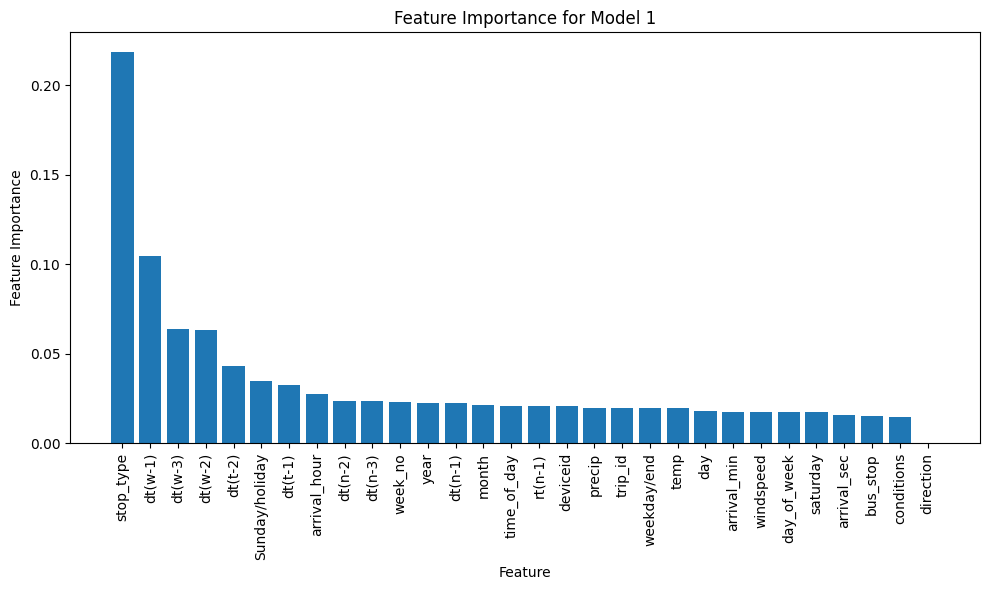

In [16]:
import matplotlib.pyplot as plt

features1 = df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature

# Get feature importances for Model 1
feature_importance1 = model1.feature_importances_

# Get the names of the features
feature_names1 = features1.columns

# Sort feature importances and feature names in descending order
sorted_idx1 = feature_importance1.argsort()[::-1]
feature_importance1 = feature_importance1[sorted_idx1]
feature_names1 = feature_names1[sorted_idx1]

# Create a bar graph for Model 1
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance1)), feature_importance1, align='center')
plt.xticks(range(len(feature_importance1)), feature_names1, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Model 1')
plt.tight_layout()
plt.show()


## Using XG boost with clusters

In [17]:
# read csv avg_for_devID_time_of_day_and_bus_stop.csv
avg_for_devID_time_of_day_and_bus_stop = pd.read_csv('../DataOut/avg_for_devID_time_of_day_and_bus_stop.csv')
avg_for_devID_time_of_day_and_bus_stop

,deviceid,time_of_day,bus_stop,starting_speed,ending_speed,average_speed,starting_acceleration,ending_acceleration,average_acceleration,time_to_slow_down,time_to_speed_up,time_stay_stop
0,116,morning,101,8.764193,6.749433,4.247826,0.022741,0.354303,-0.020680,28.595486,19.762534,25.424173
1,116,morning,102,8.834115,10.828457,8.987811,-0.019426,0.248152,0.024699,17.452569,12.766642,22.270907
2,116,morning,103,12.602200,11.189246,9.322183,-0.017614,0.443678,-0.055749,12.441579,10.706755,9.857009
3,116,morning,104,14.378760,10.930829,12.066010,0.060585,-0.085317,-0.082650,2.558581,2.229202,10.910587
4,116,morning,105,13.574932,10.906074,7.320186,-0.360223,0.496780,-0.253712,11.125765,15.699803,43.460413
...,...,...,...,...,...,...,...,...,...,...,...,...
355,262,night,111,8.639310,5.939530,4.859613,-1.619869,0.848504,-1.697007,2.000000,7.000000,0.000000
356,262,night,112,28.077800,3.239740,10.259192,0.683947,0.539957,-1.564591,9.000000,6.000000,0.000000
357,262,night,113,25.378000,4.319660,9.314265,0.071993,1.439887,-2.148259,8.000000,3.000000,0.000000
358,262,night,114,0.000000,22.138200,9.179257,-0.872238,1.115909,0.261209,0.000000,0.000000,25.000000


In [18]:
daf_with_clus = df.copy()
pivot_df = norm_clus

# Create a new 'time_of_day' column based on the time component
daf_with_clus['time_of_day'] = pd.cut(
    daf_with_clus['arrival_hour'],
    bins=[0, 6, 19, 24],
    labels=[0, 1, 2],
    include_lowest=True
)


In [19]:
daf_with_clus

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,4890.0,262,1,101,4,0,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58
1,4890.0,262,1,102,4,0,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42
2,4890.0,262,1,103,4,0,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58
3,4890.0,262,1,104,4,0,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19
4,4890.0,262,1,105,4,0,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,11205.0,513,1,110,0,1,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,191.0,1,15.0,2022,18,38,31
90560,11205.0,513,1,111,0,1,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,145.0,0,0.0,2022,18,41,11
90561,11205.0,513,1,112,0,1,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,31,10,22.2,0.0,4.3,2,146.0,0,7.0,2022,18,43,37
90562,11205.0,513,1,113,0,1,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,31,10,22.2,0.0,4.3,2,149.0,1,15.0,2022,18,46,13


In [20]:
# drop rows where bus_stop is 'BT02' or 'BT01' from avg_for_devID_time_of_day_and_bus_stop
avg_for_devID_time_of_day_and_bus_stop = avg_for_devID_time_of_day_and_bus_stop[~avg_for_devID_time_of_day_and_bus_stop['bus_stop'].isin(['BT02','BT01'])]
# Convert 'dayparts' and 'bus_stop' columns to the appropriate data types
avg_for_devID_time_of_day_and_bus_stop['time_of_day'] = avg_for_devID_time_of_day_and_bus_stop['time_of_day'].astype('category')
avg_for_devID_time_of_day_and_bus_stop['bus_stop'] = avg_for_devID_time_of_day_and_bus_stop['bus_stop'].astype(int)

# Now, attempt the merge
# daf_with_clus = pd.merge(daf_with_clus, avg_for_devID_time_of_day_and_bus_stop, on=['deviceid', 'time_of_day','bus_stop'], how='left')


C:\Users\gw\AppData\Local\Temp\ipykernel_30164\2216485946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_for_devID_time_of_day_and_bus_stop['time_of_day'] = avg_for_devID_time_of_day_and_bus_stop['time_of_day'].astype('category')
C:\Users\gw\AppData\Local\Temp\ipykernel_30164\2216485946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_for_devID_time_of_day_and_bus_stop['bus_stop'] = avg_for_devID_time_of_day_and_bus_stop['bus_stop'].astype(int)


In [21]:
# # Create a custom mapping dictionary
# dayparts_mapping = {'morning': 0, 'day': 1, 'night': 2}

# # Use the map function to label encode 'dayparts' column
# daf_with_clus['time_of_day'] = daf_with_clus['time_of_day'].map(dayparts_mapping)

In [22]:
daf_with_clus

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,4890.0,262,1,101,4,0,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58
1,4890.0,262,1,102,4,0,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42
2,4890.0,262,1,103,4,0,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58
3,4890.0,262,1,104,4,0,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19
4,4890.0,262,1,105,4,0,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,11205.0,513,1,110,0,1,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,191.0,1,15.0,2022,18,38,31
90560,11205.0,513,1,111,0,1,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,145.0,0,0.0,2022,18,41,11
90561,11205.0,513,1,112,0,1,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,31,10,22.2,0.0,4.3,2,146.0,0,7.0,2022,18,43,37
90562,11205.0,513,1,113,0,1,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,31,10,22.2,0.0,4.3,2,149.0,1,15.0,2022,18,46,13


In [23]:
# unique values in time of day
daf_with_clus['time_of_day'].unique()

# convert time of te day to int
daf_with_clus['time_of_day'] = daf_with_clus['time_of_day'].astype(int)

In [24]:
daf_with_clus

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,4890.0,262,1,101,4,0,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58
1,4890.0,262,1,102,4,0,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42
2,4890.0,262,1,103,4,0,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58
3,4890.0,262,1,104,4,0,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19
4,4890.0,262,1,105,4,0,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,11205.0,513,1,110,0,1,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,191.0,1,15.0,2022,18,38,31
90560,11205.0,513,1,111,0,1,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,145.0,0,0.0,2022,18,41,11
90561,11205.0,513,1,112,0,1,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,31,10,22.2,0.0,4.3,2,146.0,0,7.0,2022,18,43,37
90562,11205.0,513,1,113,0,1,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,31,10,22.2,0.0,4.3,2,149.0,1,15.0,2022,18,46,13


In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error





# Merge the dataframes using the device_id column
new_df = pd.merge(daf_with_clus, pivot_df, on='deviceid', how='inner')

# Define features and target
features2 = new_df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
target2 = new_df['dwell_time_in_seconds']

model2,predictions2,predicted_df2,mae2,rmse2 = train_Model(new_df)


mae_rmse_dict[f"with clusters"] = [mae2, rmse2,model2]

print(f'Mean Absolute Error with clusters : {mae2}')
print(f'Root Mean Square Error with clusters : {rmse2}')
print(" ")
    
mae_rmse_dict["skip 2"] = " "


Mean Absolute Error with clusters : 13.522715902766096
Root Mean Square Error with clusters : 27.15842676941619
 


In [26]:
# save daf_with_clus to a csv file
daf_with_clus.to_csv('../DataOut/To sheshan/df_for_dwelltime_model.csv', index=False)

# save model to a file
import pickle

pickle.dump(model2, open('../DataOut/To sheshan/dwelltime_model.sav', 'wb'))

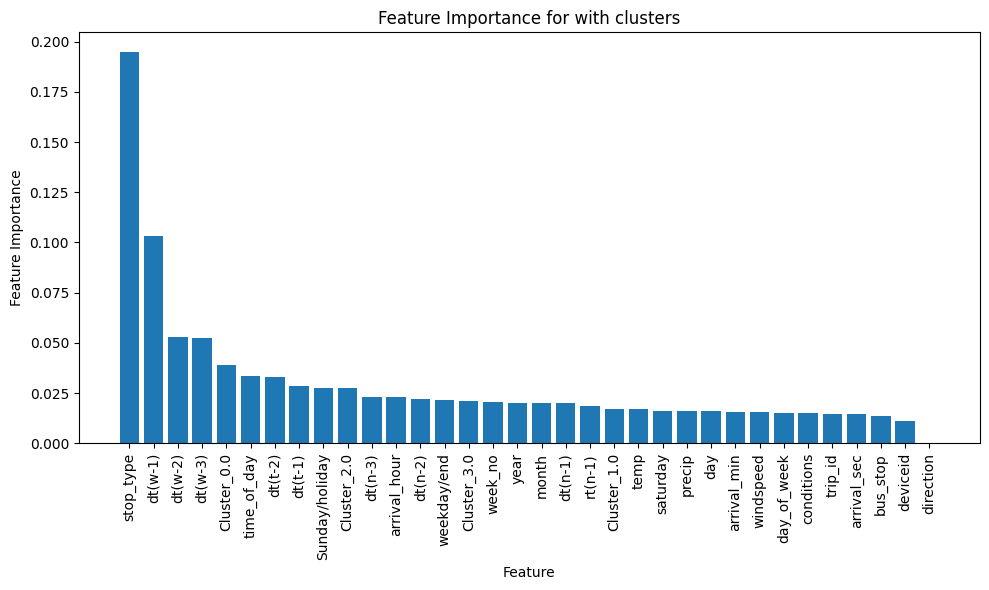

In [27]:
import matplotlib.pyplot as plt

# Get feature importances for Model 2
feature_importance2 = model2.feature_importances_

# Get the names of the features
feature_names2 = features2.columns

# Sort feature importances and feature names in descending order
sorted_idx2 = feature_importance2.argsort()[::-1]
feature_importance2 = feature_importance2[sorted_idx2]
feature_names2 = feature_names2[sorted_idx2]

# Create a bar graph for Model 2
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title(f'Feature Importance for with clusters')
plt.tight_layout()
plt.show()


# summery

In [28]:
# print mae and rmse for all models and get the best model
best_model = None
best_mae = None
best_rmse = None
for key, value in mae_rmse_dict.items():
    if key == "skip 1" or key == "skip 2" or key == "skip 3" or key == "skip 4" or key == "skip_5": 
        print(" ")
    else:
        print(f"{key} : MAE: {value[0]}, RMSE: {value[1]}")
        if best_model == None:
            best_model_name = key
            best_mae = value[0]
            best_rmse = value[1]
            best_model= value[2]
        else:
            if value[0] < best_rmse:
                best_model_name = key
                best_mae = value[0]
                best_rmse = value[1]
                best_model= value[2]
                
print(" ")
print(f"Best model : {best_model_name} , MAE: {best_mae}, RMSE: {best_rmse} ")
    
    

without clusters : MAE: 13.472003160871513, RMSE: 27.48911223777137
 
with clusters : MAE: 13.522715902766096, RMSE: 27.15842676941619
 
 
Best model : with clusters , MAE: 13.522715902766096, RMSE: 27.15842676941619 


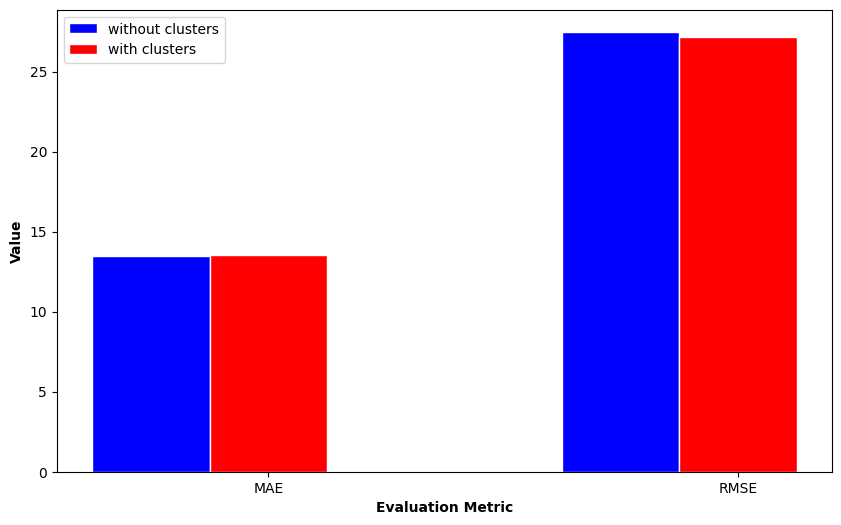

In [29]:
# draw the difference between MAE,RMSE and MAPE for best model vs the without clusters model on a side by side bar chart
import matplotlib.pyplot as plt
import numpy as np

# set width of bar

barWidth = 0.25

# set height of bar

bars1 = [mae_rmse_dict["without clusters"][0],mae_rmse_dict["without clusters"][1]]
bars2 = [mae_rmse_dict[best_model_name][0],mae_rmse_dict[best_model_name][1]]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='without clusters')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label=best_model_name)

# Add xticks on the middle of the group bars
plt.xlabel('Evaluation Metric', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MAE', 'RMSE'])

# Create legend & Show graphic
plt.legend()
plt.show()




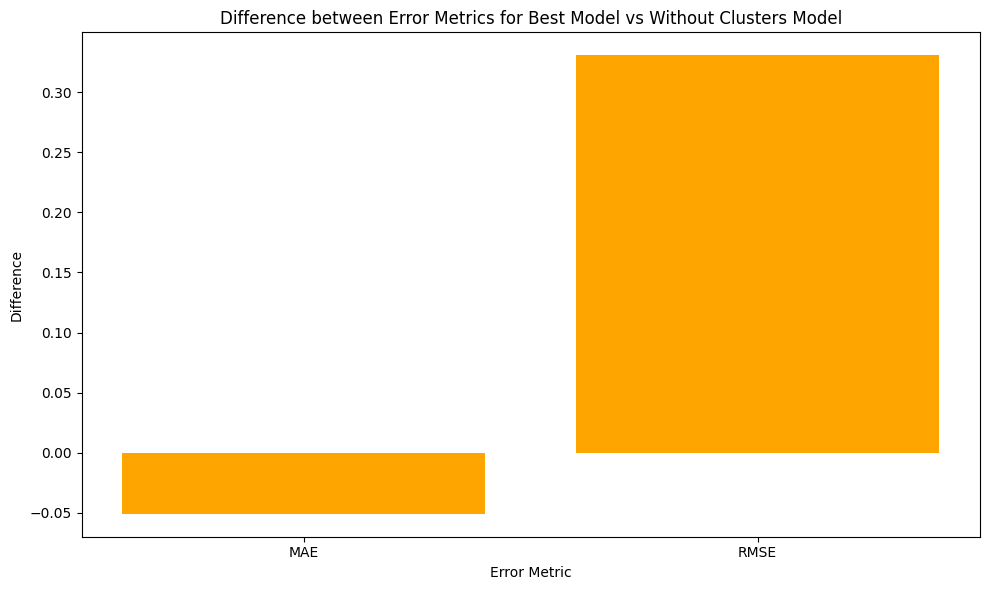

In [30]:
# draw the difference between MAE,RMSE and MAPE for best model vs the without clusters model on a multi bar graph with the 3 values for the difference of each error metric for each model.

# get the difference between MAE,RMSE and MAPE for best model vs the without clusters model
mae_diff = mae_rmse_dict['without clusters'][0] - mae_rmse_dict[best_model_name][0]
rmse_diff = mae_rmse_dict['without clusters'][1] - mae_rmse_dict[best_model_name][1]

# create a dataframe with the difference between MAE,RMSE and MAPE for best model vs the without clusters model
diff_df = pd.DataFrame({'Error Metric': ['MAE', 'RMSE'],
                        'Difference': [mae_diff, rmse_diff]})
diff_df

# Create a bar graph for the difference between MAE,RMSE and MAPE for best model vs the without clusters model
plt.figure(figsize=(10, 6))
plt.bar(diff_df['Error Metric'], diff_df['Difference'], align='center',color='orange')
plt.xlabel('Error Metric')
plt.ylabel('Difference')
plt.title('Difference between Error Metrics for Best Model vs Without Clusters Model')
plt.tight_layout()
plt.show()


In [31]:
predicted_df1

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,predicted_dwel_time
81495,1511.0,117,1,101,0,6.50,0,0,1,39,52.0,105.0,50.0,50.0,50.0,50.0,50.0,50.0,10,10,19.7,0.0,4.0,2,75.0,2,42.0,2022,6,31,53,56.962116
81496,1511.0,117,1,102,0,6.50,0,0,1,39,90.0,15.0,15.0,26.0,26.0,42.0,26.0,26.0,10,10,19.7,0.0,4.0,2,321.0,1,15.0,2022,6,37,56,43.535336
81497,1511.0,117,1,103,0,6.75,0,0,1,39,11.0,56.0,30.0,30.0,30.0,15.0,42.0,30.0,10,10,19.7,0.0,4.0,2,523.0,1,68.0,2022,6,46,54,33.809628
81498,1511.0,117,1,104,0,6.75,0,0,1,39,0.0,0.0,1.0,1.0,1.0,68.0,15.0,42.0,10,10,19.7,0.0,4.0,2,211.0,0,0.0,2022,6,51,33,2.565861
81499,1511.0,117,1,105,0,6.75,0,0,1,39,15.0,15.0,15.0,47.0,47.0,0.0,68.0,15.0,10,10,19.7,0.0,4.0,2,123.0,2,15.0,2022,6,53,36,51.703373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,11205.0,513,1,110,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,191.0,1,15.0,2022,18,38,31,16.365917
90560,11205.0,513,1,111,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,31,10,22.2,0.0,4.3,2,145.0,0,0.0,2022,18,41,11,7.326967
90561,11205.0,513,1,112,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,31,10,22.2,0.0,4.3,2,146.0,0,7.0,2022,18,43,37,3.903744
90562,11205.0,513,1,113,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,31,10,22.2,0.0,4.3,2,149.0,1,15.0,2022,18,46,13,11.792911


In [32]:
# rename predicted_df1's predicted_run_time to predicted_run_time_without_clusters
predicted_df1 = predicted_df1.rename(columns={'predicted_dwel_time': 'predicted_dwel_time_without_features'})

# rename predicted_df2's predicted_run_time to predicted_run_time_with_clusters
predicted_df2 = predicted_df2.rename(columns={'predicted_dwel_time': 'predicted_dwel_time_with_features'})

# left join predicted_df2 and predicted_df1's 'predicted_run_time_without_features' column on trip_id and segment
final_predicted_df = predicted_df2.merge(predicted_df1[['trip_id', 'bus_stop', 'predicted_dwel_time_without_features']],
                                    on=['trip_id', 'bus_stop'], how='left')

In [33]:
final_predicted_df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,Cluster_3.0,Cluster_0.0,Cluster_1.0,Cluster_2.0,predicted_dwel_time_with_features,predicted_dwel_time_without_features
0,5818.0,262,1,101,1,0,0,0,1,39,0.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,11,10,20.3,0.0,1.8,1,103.0,2,30.0,2022,6,32,33,45,2.0,2.0,51.0,73.483315,70.935318
1,5818.0,262,1,102,1,0,0,0,1,39,26.0,26.0,26.0,26.0,26.0,30.0,26.0,26.0,11,10,20.3,0.0,1.8,1,301.0,1,15.0,2022,6,38,4,45,2.0,2.0,51.0,41.931408,53.602169
2,5818.0,262,1,103,1,0,0,0,1,39,10.0,30.0,30.0,30.0,30.0,15.0,30.0,30.0,11,10,20.3,0.0,1.8,1,463.0,1,15.0,2022,6,46,2,45,2.0,2.0,51.0,28.419069,23.476168
3,5818.0,262,1,104,1,0,0,0,1,39,1.0,1.0,1.0,1.0,1.0,15.0,15.0,30.0,11,10,20.3,0.0,1.8,1,190.0,0,0.0,2022,6,49,27,45,2.0,2.0,51.0,1.778964,0.231284
4,5818.0,262,1,105,1,0,0,0,1,39,47.0,47.0,47.0,47.0,47.0,0.0,15.0,15.0,11,10,20.3,0.0,1.8,1,107.0,2,28.0,2022,6,51,14,45,2.0,2.0,51.0,9.135822,17.800074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8532,12563.0,1166,1,110,0,1,0,0,1,42,19.0,15.0,19.0,19.0,15.0,30.0,10.0,9.0,31,10,19.9,0.0,2.9,1,137.0,1,0.0,2022,7,28,27,86,3.0,0.0,11.0,16.313581,16.369741
8533,12563.0,1166,1,111,0,1,0,0,1,42,7.0,15.0,15.0,12.0,12.0,0.0,30.0,10.0,31,10,19.9,0.0,2.9,1,187.0,0,15.0,2022,7,31,34,86,3.0,0.0,11.0,9.109874,7.892729
8534,12563.0,1166,1,112,0,1,0,0,1,42,0.0,0.0,0.0,8.0,8.0,15.0,0.0,30.0,31,10,19.9,0.0,2.9,1,165.0,0,0.0,2022,7,34,34,86,3.0,0.0,11.0,7.063168,16.983130
8535,12563.0,1166,1,113,0,1,0,0,1,42,15.0,22.0,15.0,16.0,15.0,0.0,15.0,0.0,31,10,19.9,0.0,2.9,1,140.0,1,30.0,2022,7,36,54,86,3.0,0.0,11.0,17.486694,10.851686


In [34]:
# save csv predicted_df1 dwelltime_with_predictions.csv
final_predicted_df.to_csv('../DataOut/dwelltime_with_predictions.csv', index=False)